##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [342]:

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Ximena Davalos F.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


## **Anova**

In [343]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo'],
    df[df['metodo'] == 'D']['tiempo']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
  #Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 9.42
Valor p: 0.00177

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

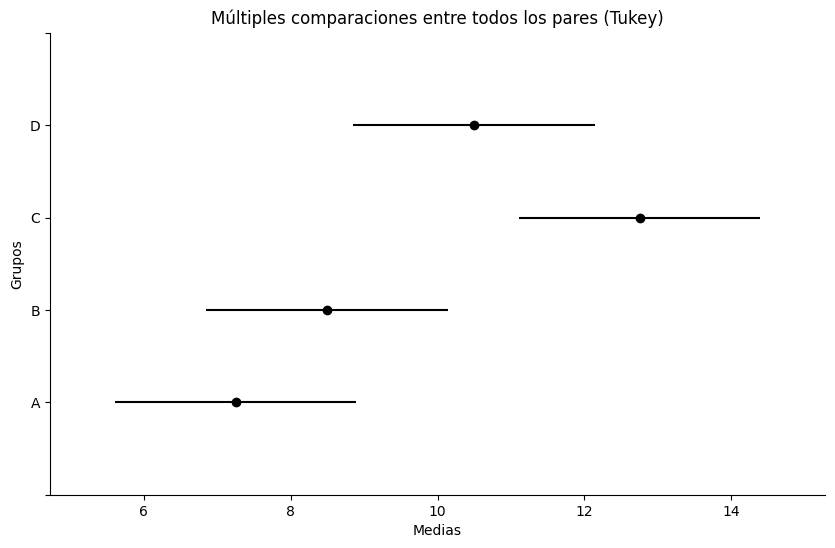

In [344]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Ximena Davalos F.

In [345]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['metodo'] == 'A']['tiempo'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'B']['tiempo'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'C']['tiempo'], "Grupo C", nivel_de_significancia)
#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8634
Valor p: 0.2725
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.8481
Valor p: 0.2200
Interpretación: Los datos tienen una distribución normal.


In [346]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
#Ximena Davalos F.


Estadístico de Bartlett: 2.4905480067200774
Valor p: 0.28786202216245355
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


**Conclusión**

El ANOVA encontró diferencias significativas entre grupos p=0.00177

Todos los grupos tienen distribución normal según Shapiro

Las varianzas son iguales entre grupos, porque el valor es mayor a 0.05, el valor es de 0.2878

El grupo C es diferente a los grupos A y B,ya que sus valores son menores a 0.05, y los demás grupos son similares entre si.



2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [392]:

import pandas as pd
from io import StringIO

datos = '''
TipoDeCuero,Observacion,Promedio
A,264,256.7
A,260,256.7
A,258,256.7
A,241,256.7
A,262,256.7
A,255,256.7
B,208,209.8
B,220,209.8
B,216,209.8
B,200,209.8
B,213,209.8
B,206,209.8
C,220,230.8
C,263,230.8
C,219,230.8
C,225,230.8
C,230,230.8
C,228,230.8
D,217,220.7
D,226,220.7
D,215,220.7
D,227,220.7
D,220,220.7
D,222,220.7
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#Ximena Davalos F.


,TipoDeCuero,Observacion,Promedio
0,A,264,256.7
1,A,260,256.7
2,A,258,256.7
3,A,241,256.7
4,A,262,256.7
5,A,255,256.7
6,B,208,209.8
7,B,220,209.8
8,B,216,209.8
9,B,200,209.8


##**Anova**

In [393]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['TipoDeCuero'] == 'A']['Observacion'],
    df[df['TipoDeCuero'] == 'B']['Observacion'],
    df[df['TipoDeCuero'] == 'C']['Observacion'],
    df[df['TipoDeCuero'] == 'D']['Observacion']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
#Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 22.76
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B -46.1667    0.0  -62.553 -29.7803   True
     A      C -25.8333 0.0014 -42.2197   -9.447   True
     A      D    -35.5    0.0 -51.8863 -19.1137   True
     B      C  20.3333 0.0118    3.947  36.7197   True
     B      D  10.6667 0.2926  -5.7197   27.053  False
     C      D  -9.6667 0.3743  -26.053   6.7197  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

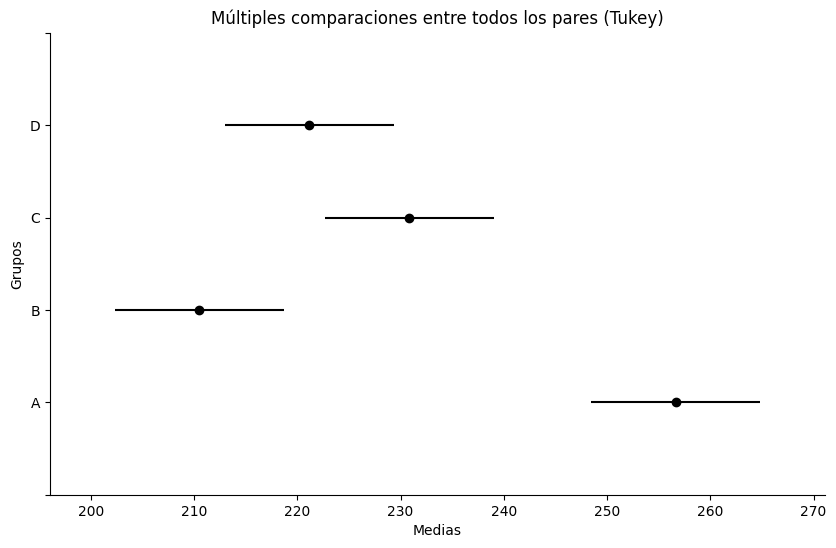

In [394]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Observacion'], groups=df['TipoDeCuero'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Ximena Davalos F.

In [349]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['TipoDeCuero'] == 'A']['Observacion'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['TipoDeCuero'] == 'B']['Observacion'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['TipoDeCuero'] == 'C']['Observacion'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['TipoDeCuero'] == 'D']['Observacion'], "Grupo D", nivel_de_significancia)

#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8348
Valor p: 0.1180
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9847
Valor p: 0.9723
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.7369
Valor p: 0.0148
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9453
Valor p: 0.7017
Interpretación: Los datos tienen una distribución normal.


In [350]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['TipoDeCuero'] == 'A']['Observacion'],
    df[df['TipoDeCuero'] == 'B']['Observacion'],
    df[df['TipoDeCuero'] == 'C']['Observacion'],
    df[df['TipoDeCuero'] == 'D']['Observacion']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#Ximena Davalos F.

Estadístico de Bartlett: 10.695662686951092
Valor p: 0.013490686639784475
Rechazamos la hipótesis nula: Las varianzas no son iguales.


**Conclusión**

El análisis muestra diferencias importantes entre los grupos p=0.00000

El grupo C no sigue una distribución normal p=0.0148

Las varianzas entre grupos no son iguales p=0.0134

El grupo A es diferente a B, C y D, porque sus valores son menores a 0.05 según la prueba Tukey



  



3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [351]:

import pandas as pd
from io import StringIO

datos = '''
Tratamiento,Valor
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3,57
T3,67
T3,55
T3,64
T3,61
T3,63
T3,63
T4,84
T4,82
T4,85
T4,92
T4,87
T4,79
T4,90
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

#Ximena Davalos F.

,Tratamiento,Valor
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


## **Anova**

In [352]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['Tratamiento'] == 'T1']['Valor'],
    df[df['Tratamiento'] == 'T2']['Valor'],
    df[df['Tratamiento'] == 'T3']['Valor'],
    df[df['Tratamiento'] == 'T4']['Valor']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

#Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 1558.97
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0757 -122.7815   True
    T1     T3 -146.8571    0.0 -153.5043   -140.21   True
    T1     T4 -122.7143    0.0 -129.3614 -116.0672   True
    T2     T3  -17.4286    0.0  -24.0757  -10.7815   True
    T2     T4    6.7143 0.0471    0.0672   13.3614   True
    T3     T4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

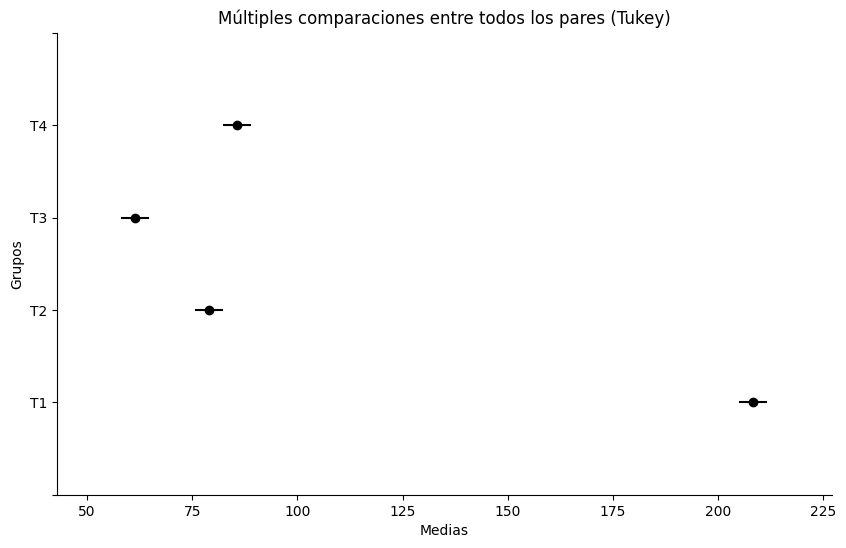

In [353]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Ximena Davalos F.

In [354]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Tratamiento'] == 'T1']['Valor'], "Grupo T1", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'T2']['Valor'], "Grupo T2", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'T3']['Valor'], "Grupo T3", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'T4']['Valor'], "Grupo T4", nivel_de_significancia)

#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo T1:
Estadístico: 0.9387
Valor p: 0.6269
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo T2:
Estadístico: 0.9200
Valor p: 0.4697
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo T3:
Estadístico: 0.9413
Valor p: 0.6506
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo T4:
Estadístico: 0.9847
Valor p: 0.9793
Interpretación: Los datos tienen una distribución normal.


In [355]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Tratamiento'] == 'T1']['Valor'],
    df[df['Tratamiento'] == 'T2']['Valor'],
    df[df['Tratamiento'] == 'T3']['Valor'],
    df[df['Tratamiento'] == 'T4']['Valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#Ximena Davalos F.

Estadístico de Bartlett: 1.1516129957961094
Valor p: 0.7646313339073795
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


**Conclusión**

El ANOVA encontró diferencias extremadamente significativas entre los grupos p=0.00000

Todos los grupos tienen distribución normal según las pruebas de Shapiro

Las varianzas entre grupos son iguales según la prueba de Bartlett

El grupo T1 es s distinto de los grupos T2, T3 y T4, ya que los valores p son menores a 0.05 en todas las comparaciones, el grupo T3 también presenta diferencias significativas con los grupos T2 y T4, y la diferencia entre T2 y T4 es  poquita pero igual es menor que 0.05 (p = 0.0471)



4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [356]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
Temperatura,Valor
20°C,15
20°C,18
20°C,13
20°C,12
40°C,17
40°C,21
40°C,11
40°C,16
60°C,23
60°C,19
60°C,25
60°C,22
80°C,28
80°C,32
80°C,34
80°C,31
100°C,45
100°C,51
100°C,57
100°C,48
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

#Ximena Davalos F.

,Temperatura,Valor
0,20°C,15
1,20°C,18
2,20°C,13
3,20°C,12
4,40°C,17
5,40°C,21
6,40°C,11
7,40°C,16
8,60°C,23
9,60°C,19


##**Anova**


In [357]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['Temperatura'] == '20°C']['Valor'],
    df[df['Temperatura'] == '40°C']['Valor'],
    df[df['Temperatura'] == '60°C']['Valor'],
    df[df['Temperatura'] == '80°C']['Valor'],
    df[df['Temperatura'] == '100°C']['Valor']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

#Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 68.05
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 100°C   20°C   -35.75    0.0 -43.4801 -28.0199   True
 100°C   40°C    -34.0    0.0 -41.7301 -26.2699   True
 100°C   60°C    -28.0    0.0 -35.7301 -20.2699   True
 100°C   80°C    -19.0    0.0 -26.7301 -11.2699   True
  20°C   40°C     1.75 0.9535  -5.9801   9.4801  False
  20°C   60°C     7.75 0.0493   0.0199  15.4801   True
  20°C   80°C    16.75 0.0001   9.0199  24.4801   True
  40°C   60°C      6.0 0.1696  -1.7301  13.7301  False
  40°C   80°C     15.0 0.0002   7.2699  22.7301   True
  60°C   80°C      9.0 0.0191   1.2699  16.7301   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

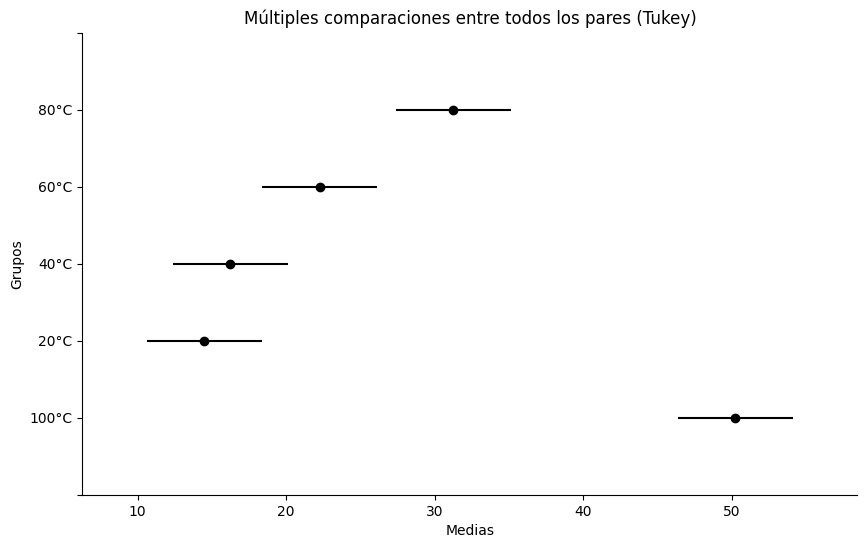

In [358]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Temperatura'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Ximena Davalos F.

In [359]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Temperatura'] == '20°C']['Valor'], "Grupo 1", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '40°C']['Valor'], "Grupo 2", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '60°C']['Valor'], "Grupo 3", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '80°C']['Valor'], "Grupo 4", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '100°C']['Valor'], "Grupo 5", nivel_de_significancia)

#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo 1:
Estadístico: 0.9456
Valor p: 0.6889
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 2:
Estadístico: 0.9763
Valor p: 0.8800
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 3:
Estadístico: 0.9815
Valor p: 0.9109
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 4:
Estadístico: 0.9815
Valor p: 0.9109
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 5:
Estadístico: 0.9714
Valor p: 0.8500
Interpretación: Los datos tienen una distribución normal.


In [360]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Temperatura'] == '20°C']['Valor'],
    df[df['Temperatura'] == '40°C']['Valor'],
    df[df['Temperatura'] == '60°C']['Valor'],
    df[df['Temperatura'] == '80°C']['Valor'],
    df[df['Temperatura'] == '100°C']['Valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#Ximena Davalos F.

Estadístico de Bartlett: 5.716341814164856
Valor p: 0.22135717752806
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


**Conclusión**

El ANOVA muestra diferencias  significativas entre los grupos con valor p 0.00000

Todos los grupos tienen distribución normal según las pruebas de Shapiro

La prueba de Bartlett confirma que las varianzas son iguales entre los grupos

En el test de Tukey, las comparaciones con valor p menor a 0.05 con diferencias significativas son:

100 °C y 20 °C, 40 °C, 60 °C, 80 °C

20 °C y 60 °C, 80 °C

60 °C y 80 °C

Y donde no hubo diferencias significativas porque fueron mayor a 0.05 fue entre:

20 °C y 40 °C

40 °C y 60 °C

40 °C y 80 °C


5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [361]:
import pandas as pd
from io import StringIO

datos = '''
Tratamiento,PorcentajeDefectuoso
ConTratamiento.,5.3
ConTratamiento.,4.0
ConTratamiento.,4.0
ConTratamiento.,4.0
ConTratamiento.,2.6
ConTratamiento.,2.1
ConTratamiento.,5.1
ConTratamiento.,4.1
ConTratamiento.,4.1
ConTratamiento.,3.2
ConTratamiento.,5.1
ConTratamiento.,2.2
ConTratamiento.,4.1
SinTratamiento.,8.0
SinTratamiento.,13.2
SinTratamiento.,7.2
SinTratamiento.,8.2
SinTratamiento.,9.1
SinTratamiento.,6.7
SinTratamiento.,12.6
SinTratamiento.,16.3
SinTratamiento.,9.2
SinTratamiento.,6.4
SinTratamiento.,7.2
SinTratamiento.,17.2
SinTratamiento.,12.3
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

#Ximena Davalos F.

,Tratamiento,PorcentajeDefectuoso
0,ConTratamiento.,5.3
1,ConTratamiento.,4.0
2,ConTratamiento.,4.0
3,ConTratamiento.,4.0
4,ConTratamiento.,2.6
5,ConTratamiento.,2.1
6,ConTratamiento.,5.1
7,ConTratamiento.,4.1
8,ConTratamiento.,4.1
9,ConTratamiento.,3.2


##**Anova**


In [362]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['Tratamiento'] == 'ConTratamiento.']['PorcentajeDefectuoso'],
    df[df['Tratamiento'] == 'SinTratamiento.']['PorcentajeDefectuoso'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

#Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 37.10
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1          group2     meandiff p-adj lower  upper reject
------------------------------------------------------------------
ConTratamiento. SinTratamiento.   6.4385   0.0 4.2569  8.62   True
------------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

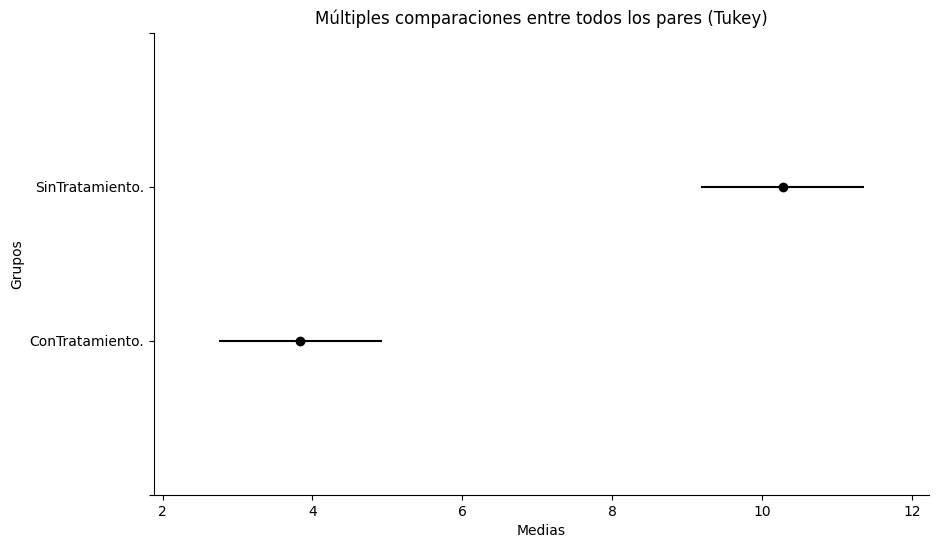

In [363]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['PorcentajeDefectuoso'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Ximena Davalos F.

In [364]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Tratamiento'] == 'ConTratamiento.']['PorcentajeDefectuoso'], "Grupo Contratamiento.", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'SinTratamiento.']['PorcentajeDefectuoso'], "Grupo Sintratamiento.", nivel_de_significancia)

#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo Contratamiento.:
Estadístico: 0.8991
Valor p: 0.1299
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo Sintratamiento.:
Estadístico: 0.8757
Valor p: 0.0624
Interpretación: Los datos tienen una distribución normal.


**Conclusión**

El ANOVA encontró diferencias muy significativas entre los grupos con valor p 0.00000  
Ambos grupos tienen distribución normal según las pruebas de Shapiro  

La prueba Tukey muestra que el grupo con tratamiento es muy diferente al grupo
sin tratamiento. La diferencia promedio entre grupos es de 6.44  para el grupo con tratamiento y se puede concluir que el tratamiento tuvo un efecto muy significativo

6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [365]:

import pandas as pd
from io import StringIO

datos = '''
PorcentajeAlmidón,Dureza
2%,4.3
2%,5.2
2%,4.8
2%,4.5
5%,6.5
5%,7.3
5%,6.9
5%,6.1
10%,9.0
10%,7.8
10%,8.5
10%,8.1
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

#Ximena Davalos F.

,PorcentajeAlmidón,Dureza
0,2%,4.3
1,2%,5.2
2,2%,4.8
3,2%,4.5
4,5%,6.5
5,5%,7.3
6,5%,6.9
7,5%,6.1
8,10%,9.0
9,10%,7.8


##**Anova**

In [366]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['PorcentajeAlmidón'] == '2%']['Dureza'],
    df[df['PorcentajeAlmidón'] == '5%']['Dureza'],
    df[df['PorcentajeAlmidón'] == '10%']['Dureza'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

#Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 58.10
Valor p: 0.00001

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10%     2%    -3.65    0.0 -4.5968 -2.7032   True
   10%     5%    -1.65 0.0023 -2.5968 -0.7032   True
    2%     5%      2.0 0.0006  1.0532  2.9468   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

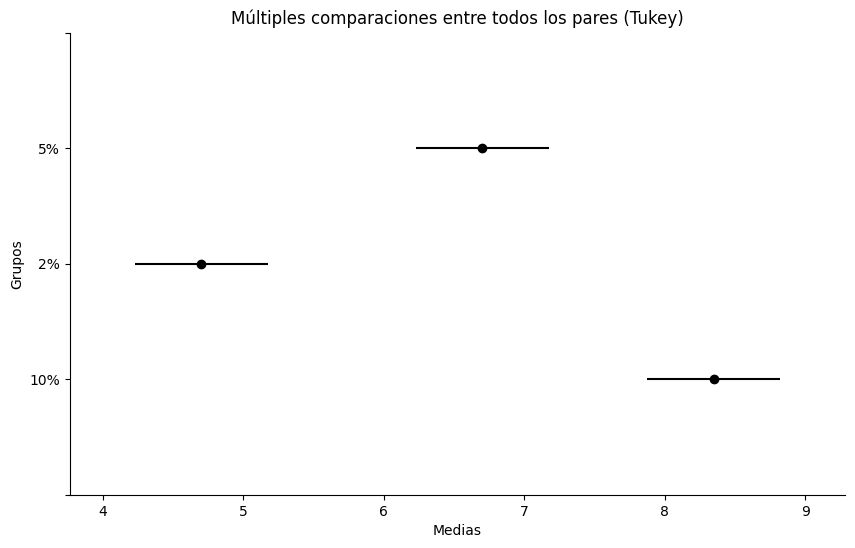

In [367]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Dureza'], groups=df['PorcentajeAlmidón'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Ximena Davalos F.

In [368]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['PorcentajeAlmidón'] == '2%']['Dureza'], "Grupo 2", nivel_de_significancia)
prueba_shapiro(df[df['PorcentajeAlmidón'] == '5%']['Dureza'], "Grupo 5", nivel_de_significancia)
prueba_shapiro(df[df['PorcentajeAlmidón'] == '10%']['Dureza'], "Grupo 10", nivel_de_significancia)

#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo 2:
Estadístico: 0.9713
Valor p: 0.8497
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 5:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 10:
Estadístico: 0.9807
Valor p: 0.9058
Interpretación: Los datos tienen una distribución normal.


In [369]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['PorcentajeAlmidón'] == '2%']['Dureza'],
    df[df['PorcentajeAlmidón'] == '5%']['Dureza'],
    df[df['PorcentajeAlmidón'] == '10%']['Dureza']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

 #Ximena Davalos F.

Estadístico de Bartlett: 0.25398027627307607
Valor p: 0.8807423583152111
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


**Conclusión**

El ANOVA muestra diferencias muy claras entre los grupos con valor p 0.00001

Todos los grupos tienen distribución normal según Shapiro

Las varianzas son iguales entre grupos según la prueba de Bartlett

La prueba Tukey muestra que todos los grupos son diferentes entre sí, porque todos son menores a 0.05, y la mayor diferenci está entre el  10% y  2% con 0.00

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [370]:

import pandas as pd
from io import StringIO

datos = '''
nivelesDenitrógeno,Rendimientos
NV1,14.823
NV1,14.676
NV1,14.720
NV1,14.5141
NV1,15.065
NV2,25.151
NV2,25.401
NV2,25.131
NV2,25.031
NV2,25.267
NV3,32.605
NV3,32.460
NV3,32.256
NV3,32.669
NV3,32.111
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

#Ximena Davalos F.

,nivelesDenitrógeno,Rendimientos
0,NV1,14.8230
1,NV1,14.6760
2,NV1,14.7200
3,NV1,14.5141
4,NV1,15.0650
5,NV2,25.1510
6,NV2,25.4010
7,NV2,25.1310
8,NV2,25.0310
9,NV2,25.2670


##**Anova**

In [371]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['nivelesDenitrógeno'] == 'NV1']['Rendimientos'],
    df[df['nivelesDenitrógeno'] == 'NV2']['Rendimientos'],
    df[df['nivelesDenitrógeno'] == 'NV3']['Rendimientos'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

#Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 10131.62
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   NV1    NV2  10.4366   0.0 10.1038 10.7694   True
   NV1    NV3  17.6606   0.0 17.3278 17.9934   True
   NV2    NV3    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

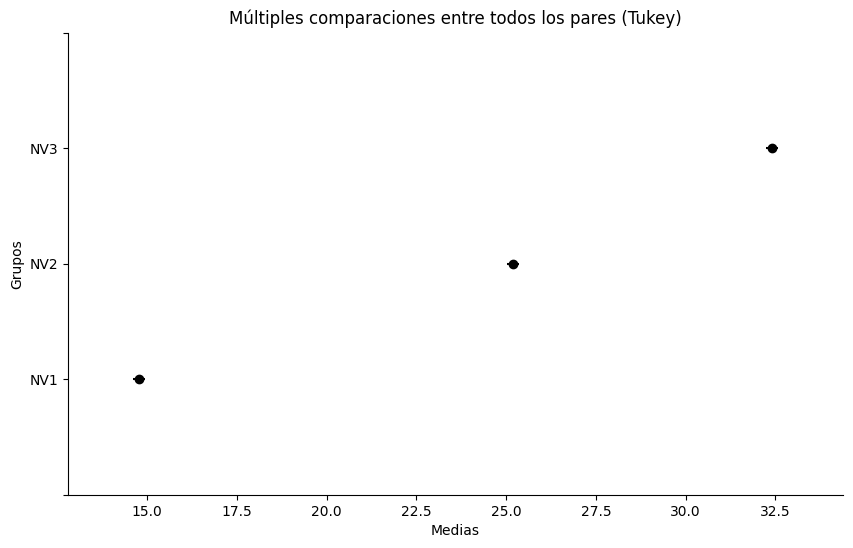

In [372]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Rendimientos'], groups=df['nivelesDenitrógeno'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Ximena Davalos F.

In [373]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['nivelesDenitrógeno'] == 'NV1']['Rendimientos'], "Grupo NV1", nivel_de_significancia)
prueba_shapiro(df[df['nivelesDenitrógeno'] == 'NV2']['Rendimientos'], "Grupo NV2", nivel_de_significancia)
prueba_shapiro(df[df['nivelesDenitrógeno'] == 'NV3']['Rendimientos'], "Grupo NV3", nivel_de_significancia)

#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo NV1:
Estadístico: 0.9710
Valor p: 0.8819
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo NV2:
Estadístico: 0.9647
Valor p: 0.8402
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo NV3:
Estadístico: 0.9406
Valor p: 0.6701
Interpretación: Los datos tienen una distribución normal.


In [374]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['nivelesDenitrógeno'] == 'NV1']['Rendimientos'],
    df[df['nivelesDenitrógeno'] == 'NV2']['Rendimientos'],
    df[df['nivelesDenitrógeno'] == 'NV3']['Rendimientos']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#Ximena Davalos F.

Estadístico de Bartlett: 0.8864989638874725
Valor p: 0.6419470329147967
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


**Conclusión**

El AMOVA encontró diferencias extremadamente significativas entre los grupos p=0.00000

Todos los grupos mostraron distribución normal en las pruebas de Shapiro

La prueba de Bartlett confirmó que las varianzas son iguales entre los grupos

El análisis Tukey muestra que los tres grupos son diferentes entre sí, todos son menores a 0.05

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [375]:
import pandas as pd
from io import StringIO

datos = '''
Aglutinante,Porcentajedefriabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

#Ximena Davalos F.

,Aglutinante,Porcentajedefriabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


##**Anova**

In [376]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['Aglutinante'] == 'PVP']['Porcentajedefriabilidad'],
    df[df['Aglutinante'] == 'CMC']['Porcentajedefriabilidad'],
    df[df['Aglutinante'] == 'Gre']['Porcentajedefriabilidad'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

#Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 4420.97
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

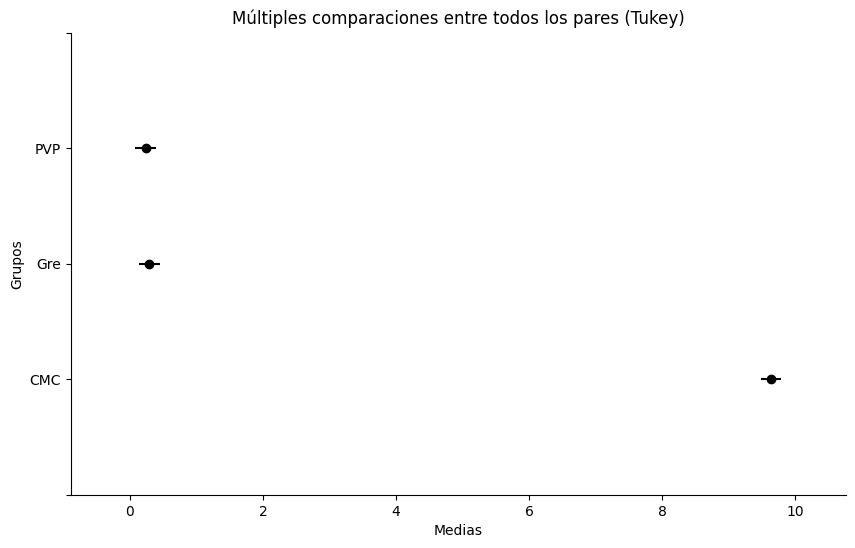

In [377]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Porcentajedefriabilidad'], groups=df['Aglutinante'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Ximena Davalos F.

In [378]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Aglutinante'] == 'PVP']['Porcentajedefriabilidad'], "Grupo PVP", nivel_de_significancia)
prueba_shapiro(df[df['Aglutinante'] == 'CMC']['Porcentajedefriabilidad'], "Grupo CMC", nivel_de_significancia)
prueba_shapiro(df[df['Aglutinante'] == 'Gre']['Porcentajedefriabilidad'], "Grupo Gre", nivel_de_significancia)

#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo PVP:
Estadístico: 0.9147
Valor p: 0.4962
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo CMC:
Estadístico: 0.9679
Valor p: 0.8616
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo Gre:
Estadístico: 0.8313
Valor p: 0.1424
Interpretación: Los datos tienen una distribución normal.


In [379]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Aglutinante'] == 'PVP']['Porcentajedefriabilidad'],
    df[df['Aglutinante'] == 'CMC']['Porcentajedefriabilidad'],
    df[df['Aglutinante'] == 'Gre']['Porcentajedefriabilidad'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#Ximena Davalos F.

Estadístico de Bartlett: 0.24372837838984224
Valor p: 0.8852685893786298
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


**Conclusión**

El ANOVA muestra diferencias extremadamente significativas entre los grupos p=0.00000

Todos los grupos cumplen con normalidad según las pruebas de Shapiro-Wilk  

La prueba de Bartlett confirma que las varianzas son iguales entre los grupos

El análisis Tukey muestra que CNC es significativamente diferente a Pre y PVP porque su valor es de 0.0 y es menor a 0.05 y Gre y PVP no tienen variaciones iguales porque su valor es mayor a 0.05


9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [380]:
import pandas as pd
from io import StringIO

datos = '''
Clona,PorcentajeDeAzúcaresReductoresTotales
P1,8.69
P1,6.68
P1,6.83
P1,6.43
P1,10.30
P2,8.00
P2,16.41
P2,12.43
P2,10.99
P2,15.53
P3,17.39
P3,13.73
P3,15.62
P3,17.05
P3,15.42
P4,10.37
P4,9.16
P4,8.83
P4,4.40
P4,10.38
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,Clona,PorcentajeDeAzúcaresReductoresTotales
0,P1,8.69
1,P1,6.68
2,P1,6.83
3,P1,6.43
4,P1,10.30
5,P2,8.00
6,P2,16.41
7,P2,12.43
8,P2,10.99
9,P2,15.53


##**Anova**

In [381]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['Clona'] == 'P1']['PorcentajeDeAzúcaresReductoresTotales '],
    df[df['Clona'] == 'P2']['PorcentajeDeAzúcaresReductoresTotales '],
    df[df['Clona'] == 'P3']['PorcentajeDeAzúcaresReductoresTotales '],
    df[df['Clona'] == 'P4']['PorcentajeDeAzúcaresReductoresTotales ']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

#Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 12.33
Valor p: 0.00020

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    P1     P2    4.886 0.0237   0.575  9.197   True
    P1     P3    8.056 0.0003   3.745 12.367   True
    P1     P4    0.842 0.9428  -3.469  5.153  False
    P2     P3     3.17 0.1939  -1.141  7.481  False
    P2     P4   -4.044 0.0699  -8.355  0.267  False
    P3     P4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

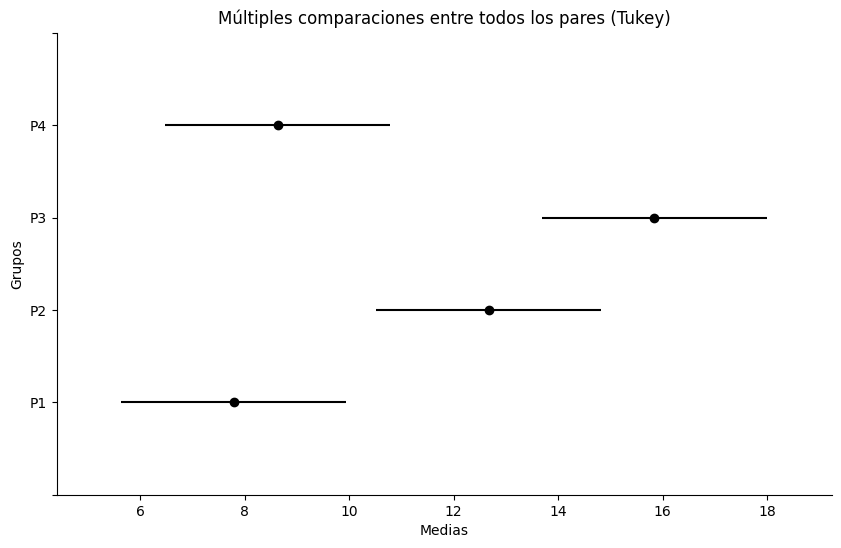

In [382]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['PorcentajeDeAzúcaresReductoresTotales '], groups=df['Clona'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Ximena Davalos F.

In [383]:
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Clona'] == 'P1']['PorcentajeDeAzúcaresReductoresTotales '], "Grupo P1", nivel_de_significancia)
prueba_shapiro(df[df['Clona'] == 'P2']['PorcentajeDeAzúcaresReductoresTotales '], "Grupo P2", nivel_de_significancia)
prueba_shapiro(df[df['Clona'] == 'P3']['PorcentajeDeAzúcaresReductoresTotales '], "Grupo P3", nivel_de_significancia)
prueba_shapiro(df[df['Clona'] == 'P4']['PorcentajeDeAzúcaresReductoresTotales '], "Grupo P4", nivel_de_significancia)

#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo P1:
Estadístico: 0.8411
Valor p: 0.1679
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo P2:
Estadístico: 0.9539
Valor p: 0.7648
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo P3:
Estadístico: 0.9348
Valor p: 0.6293
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo P4:
Estadístico: 0.7772
Valor p: 0.0522
Interpretación: Los datos tienen una distribución normal.


In [384]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Clona'] == 'P1']['PorcentajeDeAzúcaresReductoresTotales '],
    df[df['Clona'] == 'P2']['PorcentajeDeAzúcaresReductoresTotales '],
    df[df['Clona'] == 'P3']['PorcentajeDeAzúcaresReductoresTotales '],
    df[df['Clona'] == 'P4']['PorcentajeDeAzúcaresReductoresTotales ']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#Ximena Davalos F.

Estadístico de Bartlett: 3.2573646373855567
Valor p: 0.3536209118873371
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


**Conclusión**

El ANOVA encontró diferencias significativas entre los grupos con valor p 0.00020

Todos los grupos cumplen con normalidad según las pruebas de Shapiro

El análisis Tukey muestra que P1 es diferente a P2 y P3 ya que su valor es menor a 0.05


10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [385]:
import pandas as pd
from io import StringIO

datos = '''
Tratamiento,Porcentaje
conTratamiento,5.30
conTratamiento,4.03
conTratamiento,4.00
conTratamiento,2.56
conTratamiento,5.06
conTratamiento,4.06
conTratamiento,2.08
conTratamiento,4.03
conTratamiento,2.04
conTratamiento,1.18
sinTratamiento,8.02
sinTratamiento,13.18
sinTratamiento,7.15
sinTratamiento,9.11
sinTratamiento,8.23
sinTratamiento,16.3
sinTratamiento,9.20
sinTratamiento,6.35
sinTratamiento,7.15
sinTratamiento,8.66
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

#Ximena Davalos F.

,Tratamiento,Porcentaje
0,conTratamiento,5.30
1,conTratamiento,4.03
2,conTratamiento,4.00
3,conTratamiento,2.56
4,conTratamiento,5.06
5,conTratamiento,4.06
6,conTratamiento,2.08
7,conTratamiento,4.03
8,conTratamiento,2.04
9,conTratamiento,1.18


##**Anova**

In [386]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['Tratamiento'] == 'conTratamiento']['Porcentaje'],
    df[df['Tratamiento'] == 'sinTratamiento']['Porcentaje'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

#Ximena Davalos F.

Resultados del ANOVA:
F-Estadístico: 30.61
Valor p: 0.00003

Conclusión: Hay diferencias significativas entre al menos dos grupos.


##**Supuestos**

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1         group2     meandiff p-adj lower upper reject
---------------------------------------------------------------
conTratamiento sinTratamiento    5.901   0.0  3.66 8.142   True
---------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

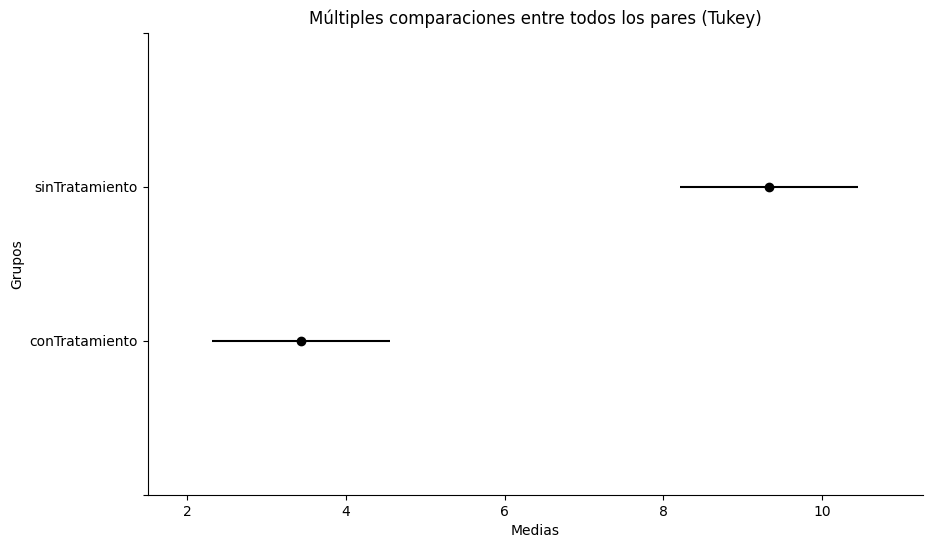

In [387]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Porcentaje'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Ximena Davalos F.

In [388]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Tratamiento'] == 'conTratamiento']['Porcentaje'], "Grupo conTratamiento", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'sinTratamiento']['Porcentaje'], "Grupo sinTratamiento", nivel_de_significancia)

#Ximena Davalos F.


Prueba de Shapiro-Wilk para Grupo conTratamiento:
Estadístico: 0.9149
Valor p: 0.3162
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo sinTratamiento:
Estadístico: 0.8049
Valor p: 0.0166
Interpretación: Los datos no tienen una distribución normal.


In [389]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Tratamiento'] == 'conTratamiento']['Porcentaje'],
    df[df['Tratamiento'] == 'sinTratamiento']['Porcentaje'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Ximena Davalos F.

Estadístico de Bartlett: 4.970612361881678
Valor p: 0.02578151815286211
Rechazamos la hipótesis nula: Las varianzas no son iguales.


**Conclusión**

El ANOVA muestra diferencias significativas entre los grupos p=0.00003

El grupo sin tratamiento no tiene distribución normal p=0.0166

Las varianzas entre grupos no son iguales p=0.0257, menor a 0.05

